In [1]:
import keras
from keras import layers
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
def Autoencoder_(x_train, x_test, x_test_noisy, y_test):
  #Creating the model
  input_img = keras.Input(shape=(784,))
  x = layers.Dense(512, activation='sigmoid')(input_img)
  x = layers.Dense(256, activation='sigmoid')(x)
  x = layers.Dense(128, activation='sigmoid')(x)
  encoder_output = layers.Dense(64, activation='sigmoid')(x)
  x = layers.Dense(128, activation='sigmoid')(encoder_output)
  x = layers.Dense(256, activation='sigmoid')(x)
  x = layers.Dense(512, activation='sigmoid')(x)
  decoder_output = layers.Dense(784, activation='sigmoid')(x)
  autoencoder = keras.Model(input_img, decoder_output)
  autoencoder.summary()

  autoencoder.compile(optimizer='adam', loss='mean_squared_error')
  #Train
  for _ in range(70):
    x_train_noisy = x_train + 0.9 * random.rand(60000, 784)
    history = autoencoder.fit(x_train_noisy, x_train, validation_split = 0.2, epochs = 1)
  
  #Test
  decoded_imgs = autoencoder.predict(x_test_noisy)
  prediction_delta = np.mean((decoded_imgs - x_test) ** 2)
  print('Loss is: ', prediction_delta)

  n = 10 # How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Display noisy image
    indx = np.random.choice(np.where(y_test == i)[0])
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[indx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[indx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
______________________________________________________________

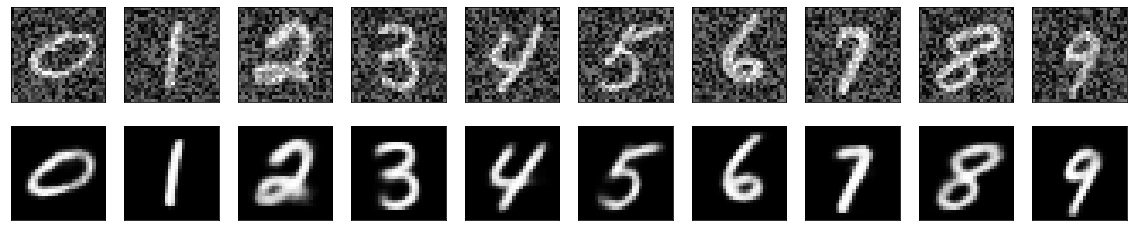

In [3]:
(X_train, _), (X_test, Y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
s = X_test.shape
X_test_noisy = X_test + 0.9 * random.rand(s[0], 784)

Autoencoder_(X_train, X_test, X_test_noisy, Y_test)